# Market Basket Analysis with a-priori algorithm

# Project description

***Transactional data in retail sales are characterized by large volumes from which we can understand purchasing behaviors by applying machine learning techniques known as market basket analysis. They allow to assemble knowledge patterns helping to have more insights on the combination of items of any given transaction, (for example the ones that are mostly purchased as well those less purchased together), From a business perspective the goal is to trigger actionable strategies such as optimizing the place of the items sold, better target promotions or decide the best prices to apply in order to better drive retail behavior. In this project i will apply the a-priori, an unsupervized learning algorithm, which proves very effective in identifying association rules or connections in large databases. The "Groceries" dataset used is taken from the "arules" R package. For more findings and explanations on this topic you can refer to the following books:

***1- B. Lanz,: "Machine learning in R, Packt publishing", 2015 : 259-284

***2- Hahsler M, HornikK, Reutterer T. "Implications of probabilistic data modeling for mining association rules". In: Gaul W, Vichi M, Weihs C, ed. "Studies in Classification, Data Analysis, and Knowledge Organization: from Data and Information Analysis to Knowledge Engineering". New York: Springer; 2006:598–605

# STEP 1: load and explore the dataset

In [1]:
install.packages("arules")

Installing package into ‘/home/bassel/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [2]:
library(arules)

Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write



In [3]:
groceries<-read.transactions("groceries.csv", sep = ";")
summary(groceries)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
            labels
1 abrasive cleaner
2 artif. sweetener
3   baby cosmetics

***Number of transactions = 9835. Number of different possible items in basket = 169. Number of purchased items = 43,367. Number of items in an average transaction = 4.409. Most frequent item sold = whole milk (2513/9835 =0.25), 25% of the transactions. Transaction sizes : example : 1643 transactions contain only 2 items.

In [10]:
# View the first 5 transactions

inspect(groceries[1:5])

    items                     
[1] {citrus fruit,            
     margarine,               
     ready soups,             
     semi-finished bread}     
[2] {coffee,                  
     tropical fruit,          
     yogurt}                  
[3] {whole milk}              
[4] {cream cheese,            
     meat spreads,            
     pip fruit,               
     yogurt}                  
[5] {condensed milk,          
     long life bakery product,
     other vegetables,        
     whole milk}              


In [11]:
#see the the support level of the first 3 items (the proportion of transactions that contain those items) 

itemFrequency(groceries[,1:3])

abrasive cleaner artif. sweetener   baby cosmetics 
    0.0035587189     0.0032536858     0.0006100661

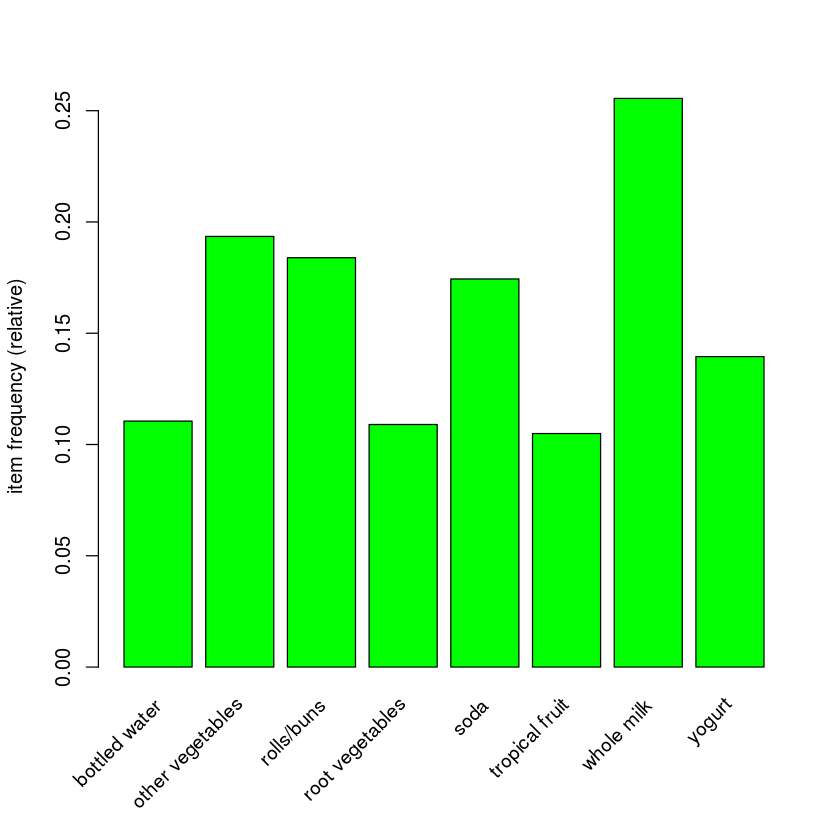

In [7]:
#Visualize item frequency (plot the item support)

col1="green"
itemFrequencyPlot(groceries, support=0.1, col=col1)

***in the plot above i chose to display Items with a minimum of 10% support (number of items / total number of transactions)

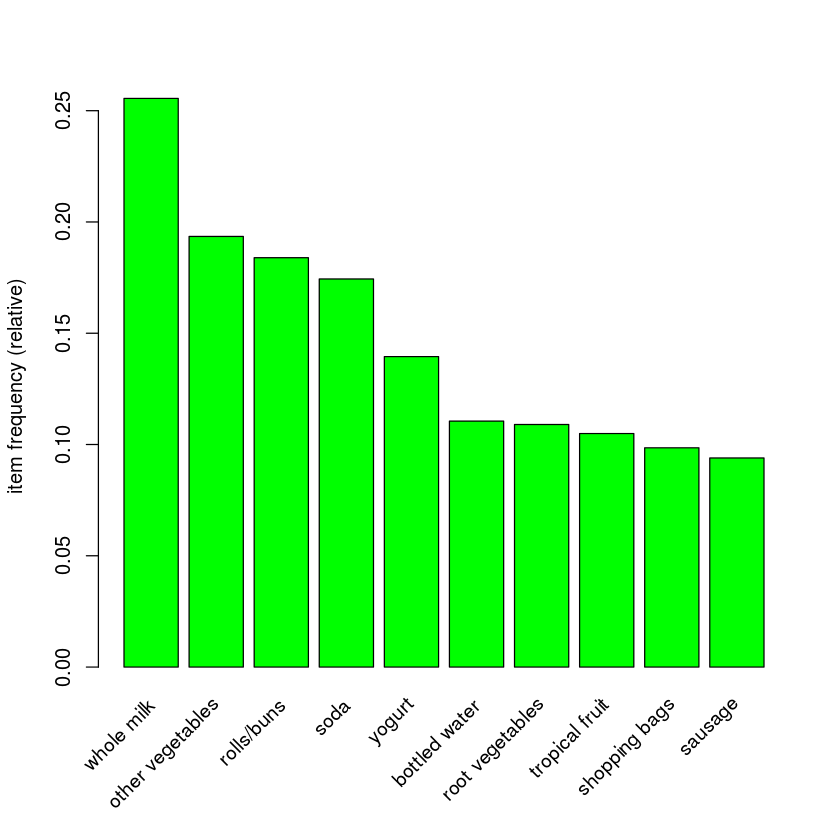

In [14]:
#Visualize top 10 items by decreasing support

itemFrequencyPlot(groceries, topN=10, col=col1)

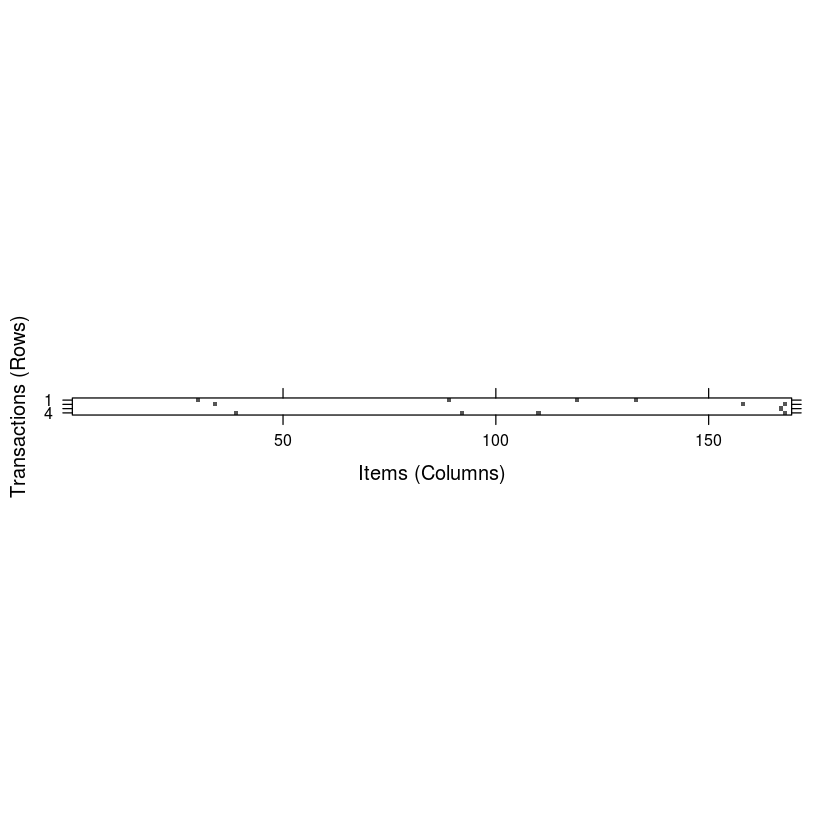

In [15]:
# Visualize the sparse matrix for the 4 first transactions 

image(groceries[1:4])

***a matrix with 4 rows and 169 items requested. cells in the matrix are filled with black for
transactions(rows) where the item is purchased

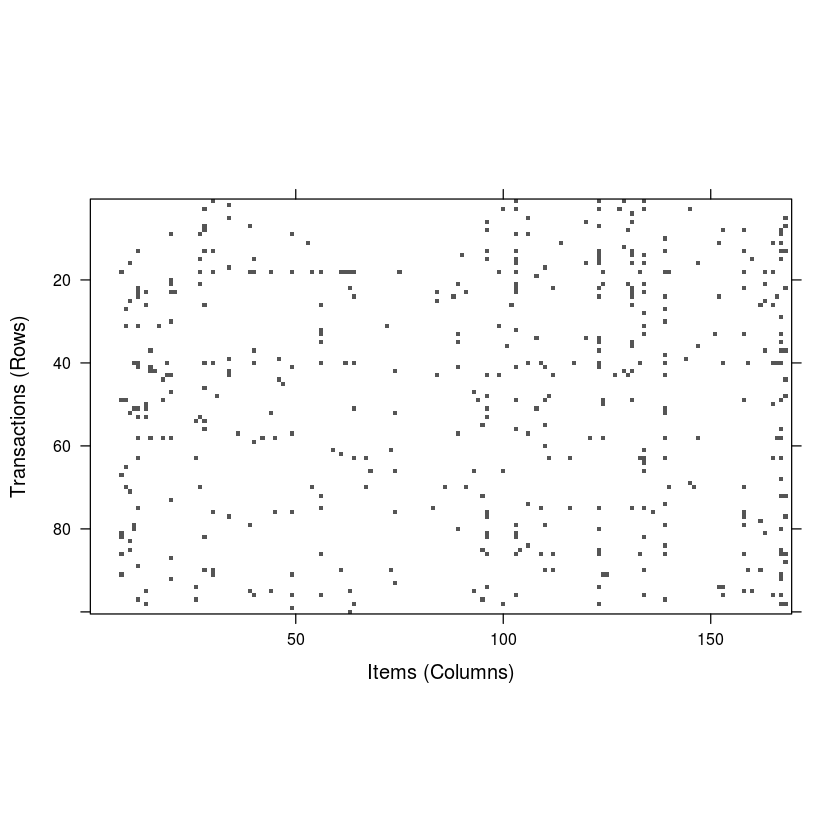

In [16]:
#display a random selection of 100 transactions 

image(sample(groceries, 100))

***slightly heavily populated columns give an indication on the popular items.However the distribution does not provide useful information about the data.


# STEP 2: Train a model on the data

In [4]:
# Use the a priori algorithm from the package arules : 

basket_rules<-apriori(groceries, # the database from which the transactions are extracted
                      parameter=list(support=0.006,   #specification of the minimum support measure required(n(x)/N)
                                    confidence=0.25, #specification of the minimum confidence measure required
                                    minlen=2        #specification of the minimum number of items required in the rule
                                    )


)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.25    0.1    1 none FALSE            TRUE       5   0.006      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 59 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [109 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [463 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [5]:
#inspect the rules object 

basket_rules

set of 463 rules 

***The rules object contains a set of 463 association rules . to determine which of them are useful we have to make further findings and specifications of the model

# STEP 3: Evaluate the model performance

In [19]:
#global view of the association rules of the model

summary(basket_rules)

set of 463 rules

rule length distribution (lhs + rhs):sizes
  2   3   4 
150 297  16 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.711   3.000   4.000 

summary of quality measures:
    support           confidence          lift            count      
 Min.   :0.006101   Min.   :0.2500   Min.   :0.9932   Min.   : 60.0  
 1st Qu.:0.007117   1st Qu.:0.2971   1st Qu.:1.6229   1st Qu.: 70.0  
 Median :0.008744   Median :0.3554   Median :1.9332   Median : 86.0  
 Mean   :0.011539   Mean   :0.3786   Mean   :2.0351   Mean   :113.5  
 3rd Qu.:0.012303   3rd Qu.:0.4495   3rd Qu.:2.3565   3rd Qu.:121.0  
 Max.   :0.074835   Max.   :0.6600   Max.   :3.9565   Max.   :736.0  

mining info:
      data ntransactions support confidence
 groceries          9835   0.006       0.25

***rule lengh distribution : count of item by rule (example 297 rules have 3 items and 16 rules have 4 items)

***summary statistics : 

***support: computation of the number of transactions containing an item divided by the total number of transactions of the database

***confidence: computation of the proportion of transactions in which the presence of an item x is dependant of an item y

***lift:the purchase likelihood of an itemset compared to its typical rate of purchase when associated with another item (>1 means strong indicator of the connection between items)

In [20]:
#Inspect the 4 first rules 

inspect(basket_rules[1:4])

    lhs             rhs                support     confidence lift     count
[1] {pot plants} => {whole milk}       0.006914082 0.4000000  1.565460 68   
[2] {pasta}      => {whole milk}       0.006100661 0.4054054  1.586614 60   
[3] {herbs}      => {root vegetables}  0.007015760 0.4312500  3.956477 69   
[4] {herbs}      => {other vegetables} 0.007727504 0.4750000  2.454874 76   


***Comments : 
support and confidence :customers buying potted plants will also buy milk : with 0.007 support and 0.400 confidence, this rule is valid in 40% of the purchases involving potted plants.
lift value :indicates the probability of whole milk purchase compared to the average customer , given that pot plants are included in the transaction.
lift value computation :  confidence/support = pott plants=>wole milk confidence (0.40) divided by whole milk support(.025)= 1.6 (matching the lift value show above)


# STEP 4: Improve model performance

***We may want to show the strongest rules by order of importance of the lift, the value or confidence

In [21]:
#Sort first 5 rules by decreasing lift value

inspect(sort(basket_rules, by="lift")[1:5])

    lhs                   rhs                      support confidence     lift count
[1] {herbs}            => {root vegetables}    0.007015760  0.4312500 3.956477    69
[2] {berries}          => {whipped/sour cream} 0.009049314  0.2721713 3.796886    89
[3] {other vegetables,                                                              
     tropical fruit,                                                                
     whole milk}       => {root vegetables}    0.007015760  0.4107143 3.768074    69
[4] {beef,                                                                          
     other vegetables} => {root vegetables}    0.007930859  0.4020619 3.688692    78
[5] {other vegetables,                                                              
     tropical fruit}   => {pip fruit}          0.009456024  0.2634561 3.482649    93


In [22]:
#Sort first 5 rules by decreasing confidence value

inspect(sort(basket_rules, by="confidence")[1:5])

    lhs                            rhs          support     confidence lift    
[1] {butter,whipped/sour cream} => {whole milk} 0.006710727 0.6600000  2.583008
[2] {butter,yogurt}             => {whole milk} 0.009354347 0.6388889  2.500387
[3] {butter,root vegetables}    => {whole milk} 0.008235892 0.6377953  2.496107
[4] {curd,tropical fruit}       => {whole milk} 0.006507372 0.6336634  2.479936
[5] {butter,tropical fruit}     => {whole milk} 0.006202339 0.6224490  2.436047
    count
[1] 66   
[2] 92   
[3] 81   
[4] 64   
[5] 61   


In [23]:
#Sort first 5 rules by decreasing support value

inspect(sort(basket_rules, by="support")[1:5])

    lhs                   rhs                support    confidence lift    
[1] {other vegetables} => {whole milk}       0.07483477 0.3867578  1.513634
[2] {whole milk}       => {other vegetables} 0.07483477 0.2928770  1.513634
[3] {rolls/buns}       => {whole milk}       0.05663447 0.3079049  1.205032
[4] {yogurt}           => {whole milk}       0.05602440 0.4016035  1.571735
[5] {root vegetables}  => {whole milk}       0.04890696 0.4486940  1.756031
    count
[1] 736  
[2] 736  
[3] 557  
[4] 551  
[5] 481  


In [6]:
#Identify a rule for a given item using indexation and subsetting (example the rules including berries and yogurt)

berry_yogurt_rules <- subset(basket_rules, items %in% c("berries","yogurt"))

# Step 5: Save rules in file or dataframe format

In [33]:
#Method 1 : xls. or csv format

write(basket_rules, file = "basket_rules.csv",sep = ",", quote = TRUE, row.names = FALSE)

#Method 2 : create a data frame with the rules in the factor format, and numeric vectors for support, confidence, and lift

basket_rules_dataframe <- as(basket_rules, "data.frame")
str(basket_rules_dataframe)

'data.frame':	463 obs. of  5 variables:
 $ rules     : Factor w/ 463 levels "{baking powder} => {other vegetables}",..: 340 302 207 206 208 341 402 21 139 140 ...
 $ support   : num  0.00691 0.0061 0.00702 0.00773 0.00773 ...
 $ confidence: num  0.4 0.405 0.431 0.475 0.475 ...
 $ lift      : num  1.57 1.59 3.96 2.45 1.86 ...
 $ count     : num  68 60 69 76 76 69 70 67 63 88 ...
